## Introduction

In this mini project, you will explore and analyze the Business Sales dataset. The dataset shows the sales of a company in different shops. Each row shows how many items of a specific product were sold on some date in some shop. The focus is on number of products sold and revenues.

The guideline is only there to give you some ideas. You don't have to follow or complete all of them. The important thing is to create a coherent analysis with meaningful comments. However, we expect that you are able to do the first 4 sections. Section 5 and 6 have more advanced questions and you may choose to do them according to your current level.

Data fields

    date - date in format yyyy-mm-dd
    date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
    shop_id - unique identifier of a shop
    shop_name - name of shop
    item_id - unique identifier of a product
    item_price - current price of the item (in Russian RUB)
    item_cnt_day - number of products sold on that date in that shop
    item_name - name of item
    item_category_id - unique identifier of item category
    item_category_name - name of item category


Shop name: The first word in shop_name is the name of a city in Russia

Item category name: Contains the general category and sub category, separated by -

In [147]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
sales = pd.read_csv('sales_eng.csv')

In [157]:
sales = sales.dropna(thresh=5) #get rid of data that is missing too much
sales = sales.drop_duplicates()#remove duplicates

#fixing the games --> could sum this all up with a function lol
sales.item_category_id = np.where((sales.item_name.str.contains("PC")), "30.0", sales.item_category_id)
sales.item_category_name = np.where((sales.item_name.str.contains("PC")), "PC Games - Standard Edition", sales.item_category_name)

sales.item_category_id = np.where((sales.item_name.str.contains("Xbox 360")), "23.0", sales.item_category_id)
sales.item_category_name = np.where((sales.item_name.str.contains("Xbox 360")), "Games - XBOX 360", sales.item_category_name)

sales.item_category_id = np.where((sales.item_name.str.contains("PS3")), "19.0", sales.item_category_id)
sales.item_category_name = np.where((sales.item_name.str.contains("PS3")), "Games - PS3", sales.item_category_name)

#fixing the nan issue
sales.item_category_id = np.where((sales.item_category_id.str.contains("nan")), np.nan, sales.item_category_id)

sales.item_category_id = np.where((sales.item_name.str.contains("SPONGE BOB")), "40.0", sales.item_category_id)
sales.item_category_name = np.where((sales.item_name.str.contains("SPONGE BOB")), "Cinema - DVD", sales.item_category_name)
#SPONGE BOB issue

sales.item_category_id = np.where((sales.item_name.str.contains("PSP") & sales.item_category_id.isnull()), "21.0", sales.item_category_id)
sales.item_category_name = np.where((sales.item_name.str.contains("PSP") & sales.item_category_name.isnull()), "Games - PSP", sales.item_category_name)
#PSP issue

sales.shop_name = np.where((sales.shop_name.str.contains("Zhukovsky")), "Zhukovsky Str. Chkalov 39 m²", sales.shop_name)

#new columns
sales["Revenue"] = sales.item_cnt_day * sales.item_price
sales.date = pd.to_datetime(sales.date, format='%Y/%m/%d', errors='coerce')
sales = sales.set_index('date').sort_index()
sales["Day"] = sales.index.day_name()
shopnames = sales.shop_name.str.split(" ").str[0]
sales["City"] = shopnames

In [161]:
sales.info() #only 60 items missing, eh deal with

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1381891 entries, 2013-01-01 to 2015-10-31
Data columns (total 12 columns):
date_block_num        1381891 non-null float64
shop_id               1381891 non-null float64
shop_name             1381891 non-null object
item_id               1381891 non-null int64
item_name             1381891 non-null object
item_price            1381833 non-null float64
item_cnt_day          1381891 non-null float64
item_category_id      1381636 non-null object
item_category_name    1381636 non-null object
Revenue               1381833 non-null float64
Day                   1381891 non-null object
City                  1381891 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 177.1+ MB


1- Initial inspection


2- Data cleaning:
    - Convert the date column to Datetime object (optional: you can choose to set it as index)
    - Inspect and handle missing values
    - Correct/remove outliers (too high item_price/item_cnt_day, negative values)


3- Create new information (only do the ones you think is needed for your analysis):
    - Revenues (items sold * item price)
    - City name
    - Product general category


4- Explore the data from different angles:
    - Plot the total amount of items sold by day. Which time of the year company makes more sales?
    - Plot the total amount sold by day of the week. Were more sales being made during the weekends?
    - Plot the top (20-30) shops by amount sold (or revenues). Which cities are they usually located?
    - Plot the top products by amount sold (or revenues). Plot the top general categories / sub-categories.
    - Bin the item_price into categories (range of your choice) and plot them.
    

5- If you want more brain burner challenges, try focusing on items through these in-depth questions
    - Which were the best selling item for each month by amounts sold / revenue?
    - How many items haven't made a sale in the last 6 months?
    - A manager wants to know which items have been selling consistently well. She defines that an item has a good  month if it accumulates more than 100000 RUB in revenues. Show 10 items that have the most good months and their average monthly revenues.
    - Sometimes an item is sold at a higher or lower than its usual price. A manager wants to know if they make more sales (in total and on average) when they increase or decrease the product price. An item is deemed overpriced (underpriced) when it's sold at 10% higher (lower) than the item's average price, otherwise it's priced normally. 
    

6- Alternatively, you can focus on the shop
    - Plot the daily revenues of the top 5 shops (in terms of total revenues).
    - Show the top 10 shops that sell the widest range of products (hint: nunique). Plot a double bar chart showing the number of unique product and total revenues (hint: use .agg()).
    - What is the correlation between yesterday revenues and today revenues? For easy version, do it on the global  scale. For a very hard version, group the data by shop and then by date (sum revenues), then create a column     that shows the previous day's revenue.

dataclean - datetime, missing values, inspect outliers
create a category column, city, revenue

In [164]:
sales[(sales.item_cnt_day<0)] #assuming these are returns?

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
608,2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",6724,Star Wars Battlefront Renegade Squadron (Essen...,299.5,-1.0,21.0,Games - PSP
905,2013-01-02,0.0,29.0,"Moscow Shopping center ""New Century"" (Novokosino)",20149,"Smart ass?! [PS Vita, Russian version]",1299.0,-1.0,22.0,Games - PSVita
1233,2013-01-02,0.0,29.0,"Moscow Shopping center ""New Century"" (Novokosino)",6724,Star Wars Battlefront Renegade Squadron (Essen...,599.0,-1.0,21.0,Games - PSP
1585,2013-01-02,0.0,2.0,"Adygea Shopping center ""Mega""",7867,"Worms: Open War (Essentials) [PSP, Russian doc...",299.5,-1.0,21.0,Games - PSP
1592,2013-01-02,0.0,2.0,"Adygea Shopping center ""Mega""",2920,Disney. LEGO Pirates of the Caribbean (Essenti...,598.5,-1.0,21.0,Games - PSP
...,...,...,...,...,...,...,...,...,...,...
1378162,2015-10-27,33.0,28.0,"Moscow Shopping center ""MEGA Teply Stan"" II",7223,"Uncharted: Nathan Drake. Collection [PS4, Russ...",3999.0,-1.0,20.0,Games - PS4
1378641,2015-10-28,33.0,31.0,"Moscow Shopping center ""Семеновский""",16353,Nosov Nikolay Bobik visiting Barbos and other ...,249.0,-1.0,43.0,Books - Audiobooks
1378652,2015-10-28,33.0,25.0,"Moscow Shopping center ""Atrium""",13304,Comic Death Beauty,799.0,-1.0,47.0,"Books - Comics, manga"
1379088,2015-10-28,33.0,25.0,"Moscow Shopping center ""Atrium""",13215,Comic Malefic Time Volume 1 Apocalypse,799.0,-1.0,47.0,"Books - Comics, manga"


In [157]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,1.381891e+06,1.381891e+06,1.381891e+06,1.381833e+06,1.381891e+06,1.381522e+06
mean,1.417271e+01,2.091522e+01,9.546994e+03,9.000179e+02,1.204432e+00,3.474706e+01
std,9.383333e+00,8.982209e+00,6.136631e+03,1.806821e+03,2.734542e+00,1.282000e+01
min,0.000000e+00,0.000000e+00,1.800000e+01,-1.000000e+00,-9.000000e+00,0.000000e+00
25%,6.000000e+00,1.500000e+01,4.245000e+03,2.490000e+02,1.000000e+00,2.500000e+01
50%,1.300000e+01,2.500000e+01,7.899000e+03,3.990000e+02,1.000000e+00,3.700000e+01
75%,2.200000e+01,2.800000e+01,1.442900e+04,9.490000e+02,1.000000e+00,4.000000e+01
max,3.300000e+01,5.900000e+01,2.216700e+04,5.920000e+04,2.169000e+03,7.900000e+01


In [64]:
sales[sales.item_price.isnull()] #missing categories, or price - can fix game categories?


,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
22386,2013-01-11,0.0,31.0,"Moscow Shopping center ""Семеновский""",1956,"Black Horns PSP Slim Set ""CRYSTAL"" 3 in 1 (pl....",NaN,1.0,4.0,Accessories - PSP
24044,2013-01-11,0.0,31.0,"Moscow Shopping center ""Семеновский""",2822,"Dirt Showdown [PC, English version]",NaN,1.0,30.0,PC Games - Standard Edition
242549,2013-05-17,4.0,2.0,"Adygea Shopping center ""Mega""",15060,"Sword and Magic. Heroes 6 [PC, Jewel, Russian ...",NaN,1.0,30.0,PC Games - Standard Edition
243256,2013-05-17,4.0,57.0,"Yakutsk Ordzhonikidze, 56",6013,RAMMSTEIN Live From Berlin DVD (Кир.),NaN,1.0,59.0,Music - Musical video
264824,2013-06-01,5.0,7.0,"Voronezh Shopping center ""Maksimir""",3186,"Elder Scrolls V: Skyrim [PC, Jewel, Russian ve...",NaN,1.0,30.0,PC Games - Standard Edition
379483,2013-08-11,7.0,25.0,"Moscow Shopping center ""Atrium""",3183,"Elder Scrolls V: Skyrim Legendary Edition [PC,...",NaN,1.0,30.0,PC Games - Standard Edition
390819,2013-08-18,7.0,42.0,"St.Petersburg Shopping center ""Nevsky Center""",1921,Bestseller. Behind Enemy Lines 2: Assault. Ful...,NaN,1.0,30.0,PC Games - Standard Edition
394372,2013-08-21,7.0,29.0,"Moscow Shopping center ""New Century"" (Novokosino)",5682,PSP E1008: адаптер ARTPLAYS 100-240V,NaN,1.0,4.0,Accessories - PSP
420764,2013-09-05,8.0,46.0,"Sergiev Posad Shopping center ""7YA""",4810,Medal of Honor: Warfighter. Limited Edition [P...,NaN,1.0,19.0,Games - PS3
451923,2013-09-25,8.0,25.0,"Moscow Shopping center ""Atrium""",15102,microrobot scarab,NaN,1.0,62.0,"Gifts - Gadgets, robots, sports"


In [224]:
sales.item_category_name.unique()

array(['Music - CD of local production', 'PC Games - Standard Edition',
       'Games - XBOX 360', 'Cinema - DVD', 'Games - PSP',
       'Games - Accessories for games', 'Games - PS3',
       'Books - Audiobooks 1C', 'Games - PSVita', 'Music - Musical video',
       'Accessories - XBOX 360', 'Payment cards - PSN',
       "Cinema - Collector's", 'Accessories - PSP', 'Books - Audiobooks',
       'Accessories - PS3', 'Payment cards - Live!',
       'Cinema - Blu-Ray 3D', 'Music - CD of branded production',
       'Cinema - Blu-Ray', 'Accessories - PSVita',
       'Books - Methodical materials 1С', 'Music - MP3',
       'PC Games - Additional Edition', 'Game Consoles - PSP',
       'Accessories - PS4', 'Music - Vinyl', 'Game Consoles - PS3',
       'Game Consoles - XBOX 360', nan, 'Games - PS2',
       'Delivery of goods', 'PC - Headsets / Headphones',
       'Books - Business Literature', 'Books - Computer Literature',
       'Game Consoles - PS2', 'Книги - Путеводители',
       'Payment 

In [225]:
sales[sales.isnull().all(axis=1)] #good!

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name


In [ ]:
#making new columns - REVENUE

In [5]:
sales["Revenue"] = sales.item_cnt_day * sales.item_price
sales.head()

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name,Revenue
0,2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",2589,DEPECHE MODE Exciter,279.0,1.0,55.0,Music - CD of local production,279.0
1,2013-01-01,0.0,14.0,"Kazan Shopping center ""ParkHaus"" II",1249,ADELE 21,299.0,1.0,55.0,Music - CD of local production,299.0
2,2013-01-01,0.0,19.0,"Kursk Shopping center ""Pushkinsky""",2703,"Dark Souls: Prepare to Die Edition [PC, Jewel,...",599.0,1.0,30.0,PC Games - Standard Edition,599.0
3,2013-01-01,0.0,27.0,"Moscow Shopping center ""MEGA Belaya Dacha II""",3556,Forza Motorsport 4 [Xbox 360],2199.0,1.0,23.0,Games - XBOX 360,2199.0
4,2013-01-01,0.0,28.0,"Moscow Shopping center ""MEGA Teply Stan"" II",10106,REMEMBER ALL (2012),399.0,1.0,40.0,Cinema - DVD,399.0


In [6]:
sales.date = pd.to_datetime(sales.date, format='%Y/%m/%d', errors='coerce')
sales = sales.set_index('date').sort_index()
sales.head()

,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name,Revenue
date,,,,,,,,,,
2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",2589,DEPECHE MODE Exciter,279.0,1.0,55.0,Music - CD of local production,279.0
2013-01-01,0.0,14.0,"Kazan Shopping center ""ParkHaus"" II",1249,ADELE 21,299.0,1.0,55.0,Music - CD of local production,299.0
2013-01-01,0.0,19.0,"Kursk Shopping center ""Pushkinsky""",2703,"Dark Souls: Prepare to Die Edition [PC, Jewel,...",599.0,1.0,30.0,PC Games - Standard Edition,599.0
2013-01-01,0.0,27.0,"Moscow Shopping center ""MEGA Belaya Dacha II""",3556,Forza Motorsport 4 [Xbox 360],2199.0,1.0,23.0,Games - XBOX 360,2199.0
2013-01-01,0.0,28.0,"Moscow Shopping center ""MEGA Teply Stan"" II",10106,REMEMBER ALL (2012),399.0,1.0,40.0,Cinema - DVD,399.0


In [ ]:
sales["Day"] = sales.index.day_name()
sales.head()

In [88]:
#create a city column
shopnames = sales.shop_name.str.split(" ").str[0]
sales["City"] = shopnames
sales.head()

,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name,Revenue,Day,City
date,,,,,,,,,,,,
2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",2589,DEPECHE MODE Exciter,279.0,1.0,55.0,Music - CD of local production,279.0,Tuesday,Krasnoyarsk
2013-01-01,0.0,14.0,"Kazan Shopping center ""ParkHaus"" II",1249,ADELE 21,299.0,1.0,55.0,Music - CD of local production,299.0,Tuesday,Kazan
2013-01-01,0.0,19.0,"Kursk Shopping center ""Pushkinsky""",2703,"Dark Souls: Prepare to Die Edition [PC, Jewel,...",599.0,1.0,30.0,PC Games - Standard Edition,599.0,Tuesday,Kursk
2013-01-01,0.0,27.0,"Moscow Shopping center ""MEGA Belaya Dacha II""",3556,Forza Motorsport 4 [Xbox 360],2199.0,1.0,23.0,Games - XBOX 360,2199.0,Tuesday,Moscow
2013-01-01,0.0,28.0,"Moscow Shopping center ""MEGA Teply Stan"" II",10106,REMEMBER ALL (2012),399.0,1.0,40.0,Cinema - DVD,399.0,Tuesday,Moscow


In [68]:
sales.head()

,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name,Revenue,Day
date,,,,,,,,,,,
2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",2589,DEPECHE MODE Exciter,279.0,1.0,55.0,Music - CD of local production,279.0,Tuesday
2013-01-01,0.0,14.0,"Kazan Shopping center ""ParkHaus"" II",1249,ADELE 21,299.0,1.0,55.0,Music - CD of local production,299.0,Tuesday
2013-01-01,0.0,19.0,"Kursk Shopping center ""Pushkinsky""",2703,"Dark Souls: Prepare to Die Edition [PC, Jewel,...",599.0,1.0,30.0,PC Games - Standard Edition,599.0,Tuesday
2013-01-01,0.0,27.0,"Moscow Shopping center ""MEGA Belaya Dacha II""",3556,Forza Motorsport 4 [Xbox 360],2199.0,1.0,23.0,Games - XBOX 360,2199.0,Tuesday
2013-01-01,0.0,28.0,"Moscow Shopping center ""MEGA Teply Stan"" II",10106,REMEMBER ALL (2012),399.0,1.0,40.0,Cinema - DVD,399.0,Tuesday


# QUESTIONS

In [ ]:

13 agg available functions
mean(): Compute mean of groups
sum(): Compute sum of group values
size(): Compute group sizes
count(): Compute count of group
std(): Standard deviation of groups
var(): Compute variance of groups
sem(): Standard error of the mean of groups
describe(): Generates descriptive statistics
first(): Compute first of group values
last(): Compute last of group values
nth() : Take nth value, or a subset if n is a list
min(): Compute min of group values
max(): Compute max of group values

In [ ]:
#best day? best products? best center?

In [17]:
#BEST DAY
day = sales.groupby("Day")
Success = day[["Revenue"]].sum()
Success

,Revenue
Day,
Friday,2.814394e+08
Monday,1.791024e+08
Saturday,3.077972e+08
Sunday,2.428576e+08
Thursday,2.148435e+08
Tuesday,2.447088e+08
Wednesday,2.132786e+08


In [50]:
Success['Pct'] = ((Success.Revenue / Success.Revenue.sum())*100).round(2)
Success

,Revenue,Pct
Day,,
Friday,2.814394e+08,16.71
Monday,1.791024e+08,10.64
Saturday,3.077972e+08,18.28
Sunday,2.428576e+08,14.42
Thursday,2.148435e+08,12.76
Tuesday,2.447088e+08,14.53
Wednesday,2.132786e+08,12.66


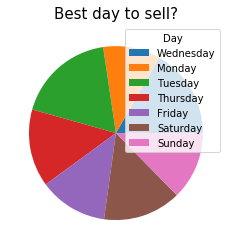

In [48]:
day_success = Success.Pct.plot(kind='pie', labels=None)

day_success.set_title('Best day to sell?', fontsize=15)
day_success.set_ylabel('')
day_success.legend(labels=Success.index.value_counts().index, title="Day")

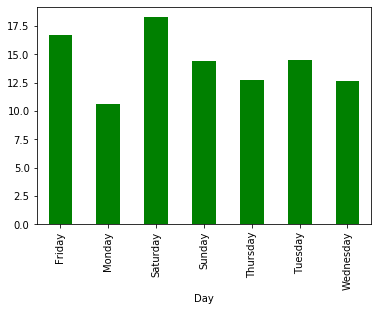

In [45]:
day_success = Success.Pct.plot(kind='bar', color='g') #Saturday and Fridays best, how to actually sort by day of week?

In [105]:
#BEST CENTER?
store = sales.groupby("City")
storestat = store[["Revenue"]].sum()

In [107]:
storestat['Pct'] = ((storestat.Revenue / storestat.Revenue.sum())*100).round(2)
#drop zero percent ones?

# Get names of indexes for which column Age has value 30
ignore = storestat[ storestat['Pct'] == 0 ].index
ignoreMoscow = storestat[storestat.index == "Moscow"].index
# Delete these row indexes from dataFrame
storestat.drop(ignore , inplace=True)
storestat.drop(ignoreMoscow, inplace=True)
storestat

#narrow to city?

,Revenue,Pct
City,,
Adygea,4.013425e+07,5.46
Balashikha,2.771876e+07,3.77
Kaluga,6.034663e+07,8.21
Kazan,4.785067e+07,6.51
Kolomna,4.912097e+07,6.68
Krasnoyarsk,1.038130e+08,14.12
Kursk,5.780617e+07,7.86
Mytischi,5.098202e+06,0.69
N.Novgorod,7.284418e+06,0.99


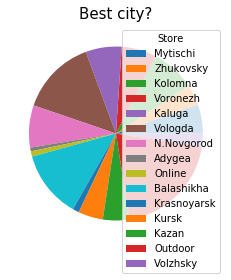

In [104]:
storestats = storestat.Pct.plot(kind='pie', labels=None)

storestats.set_title('Best city?', fontsize=15)
storestats.set_ylabel('')
storestats.legend(labels=storestat.index.value_counts().index, title="Store")

#MOSCOW takes up over 50% so massive skew, cities not shown have minimal input

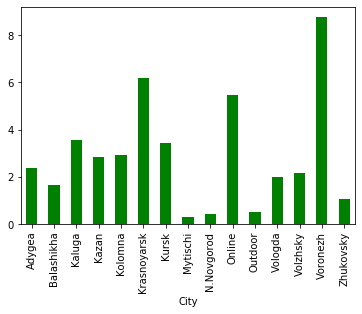

In [98]:
citystats = storestat.Pct.plot(kind='bar', color='g')

In [115]:
sales[sales.date_block_num < 12] #year progression as scatter chart, year vs revenue, maybe identify failing stores?
#so groupby store, make information for each year, plot

#Which time of the year company makes more sales?
#Plot the top products by amount sold (or revenues). Plot the top general categories / sub-categories.

,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name,Revenue,Day
date,,,,,,,,,,,
2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",2589,DEPECHE MODE Exciter,279.0,1.0,55.0,Music - CD of local production,279.0,Tuesday
2013-01-01,0.0,14.0,"Kazan Shopping center ""ParkHaus"" II",1249,ADELE 21,299.0,1.0,55.0,Music - CD of local production,299.0,Tuesday
2013-01-01,0.0,19.0,"Kursk Shopping center ""Pushkinsky""",2703,"Dark Souls: Prepare to Die Edition [PC, Jewel,...",599.0,1.0,30.0,PC Games - Standard Edition,599.0,Tuesday
2013-01-01,0.0,27.0,"Moscow Shopping center ""MEGA Belaya Dacha II""",3556,Forza Motorsport 4 [Xbox 360],2199.0,1.0,23.0,Games - XBOX 360,2199.0,Tuesday
2013-01-01,0.0,28.0,"Moscow Shopping center ""MEGA Teply Stan"" II",10106,REMEMBER ALL (2012),399.0,1.0,40.0,Cinema - DVD,399.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31,11.0,7.0,"Voronezh Shopping center ""Maksimir""",6498,"Sims 3: Paradise Islands (addition) [PC, Russi...",349.5,3.0,30.0,PC Games - Standard Edition,1048.5,Tuesday
2013-12-31,11.0,2.0,"Adygea Shopping center ""Mega""",6622,"Sleeping Dogs. Standard Edition [PC, Jewel рус...",199.0,1.0,30.0,PC Games - Standard Edition,199.0,Tuesday
2013-12-31,11.0,12.0,Online shop Emergency,3851,Heavy Rain (Essentials) (with PS Move support)...,735.0,1.0,19.0,Games - PS3,735.0,Tuesday


In [134]:
#make year 1, 2, 3 columns
first_year = sales[sales.date_block_num < 12]
second_year = sales[(sales.date_block_num > 11) & (sales.date_block_num < 24)]
third_year = sales[(sales.date_block_num > 23) & (sales.date_block_num < 34)] #NOT THE WHOLE YEAR
storesales1 = first_year.groupby("shop_name")
YEAR1 = storesales1[["Revenue"]].sum()
YEAR1

,Revenue
shop_name,
"Adygea Shopping center ""Mega""",1.215729e+07
"Balashikha Shopping center ""October-Kinomir""",8.052479e+06
"Chekhov Shopping center ""Carnival""",3.534750e+03
"Kaluga Shopping center ""XXI Century""",2.198842e+07
"Kazan Shopping center ""Behetle""",3.530765e+06
"Kazan Shopping center ""ParkHaus"" II",1.480636e+07
"Khimki Shopping center ""Mega""",7.077000e+03
"Kolomna Shopping center ""Rio""",1.872985e+07
"Krasnoyarsk Shopping center ""June""",3.555361e+07


In [133]:
storesales2 = second_year.groupby("shop_name")
YEAR2 = storesales2[["Revenue"]].sum()
YEAR2

,Revenue
shop_name,
"Adygea Shopping center ""Mega""",1.749266e+07
"Balashikha Shopping center ""October-Kinomir""",1.153676e+07
"Chekhov Shopping center ""Carnival""",1.165300e+04
"Kaluga Shopping center ""XXI Century""",2.345652e+07
"Kazan Shopping center ""Behetle""",1.757623e+06
"Kazan Shopping center ""ParkHaus"" II",1.659841e+07
"Khimki Shopping center ""Mega""",4.719480e+03
"Kolomna Shopping center ""Rio""",1.873805e+07
"Krasnoyarsk Shopping center ""June""",2.586230e+07


In [ ]:
storesales3 = third_year.groupby("shop_name")
YEAR3 = storesales3[["Revenue"]].sum()
YEAR3

In [141]:
sales.shop_name.unique()

array(['Krasnoyarsk Shopping center "June"',
       'Kazan Shopping center "ParkHaus" II',
       'Kursk Shopping center "Pushkinsky"',
       'Moscow Shopping center "MEGA Belaya Dacha II"',
       'Moscow Shopping center "MEGA Teply Stan" II',
       'Kaluga Shopping center "XXI Century"',
       'Voronezh Shopping center "Maksimir"',
       'Kazan Shopping center "Behetle"',
       'Voronezh Shopping center City-Park "Grad"',
       'Adygea Shopping center "Mega"',
       'Volzhsky Shopping center "Volga Mall"',
       'Moscow Shopping center "Atrium"',
       'Moscow Shopping center "Семеновский"',
       'Moscow Shopping center "Areal" (Belyaevo)',
       'Moscow Shopping center "Budenovskiy" (pav.K7)',
       'Voronezh (Plekhanovskaya, 13)',
       'Moscow Shopping center "New Century" (Novokosino)',
       'Moscow Shopping center "Perlovski"',
       'Balashikha Shopping center "October-Kinomir"',
       'Moscow Shopping center "Budenovskiy" (pav.A2)',
       'Zhukovsky Str. Chk